We will be working with a small audio file. It is an excerpt of a whale song made available by the [Alaska Whale Foundation](https://www.alaskawhalefoundation.org/). Do check out their website to learn more and for breathtaking imagery!

In [1]:
[x, sr] = audioread('data/whale_singing_excerpt.wav');

The audio file is around 5.2 seconds long, sampled at 16kHz. 

audioread returns the sampled data as an array (with values between -1 and 1), along with the sampling rate.

In [2]:
size(x)


ans =

       84212           1



In [3]:
sr


sr =

       16000



We can listen to the audio sample straight from our browser!

In [4]:
sound(x, sr)

Let's plot the first 100 sampled values.

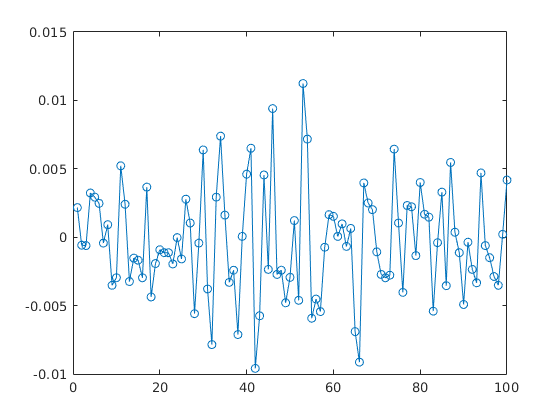

In [4]:
plot(x(1:100, :), '-o')

This is what a conventional (linear-frequency) spectogram of the sample would look like.

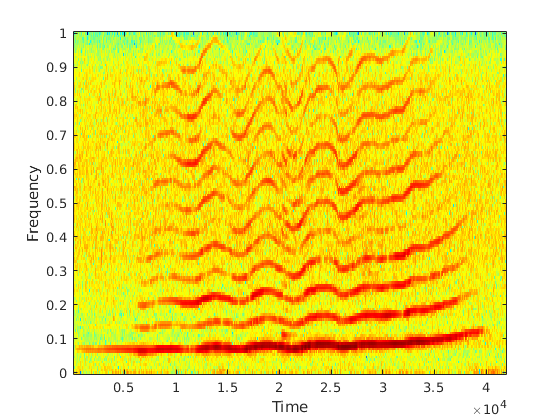

In [7]:
specgram(x)

For comparisons sake, this is what a log-frequency spectogram would look like (plotted using function defined in logfsgram.m).

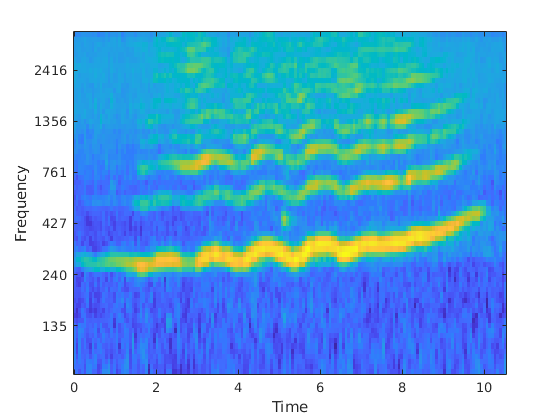

In [9]:
logfsgram(x)

Let's now take a look at linear reassignment as defined in `reassignmentgw.m`.

This function takes in a signal, performs reassignment as outlined in the [Sparse Time-Frequency Representations paper](https://doi.org/10.1073/pnas.0601707103) and returns a spectogram.

The function uses a natural coordinate system. Time in samples is 1 to N where N is the count of samples in our signal. Frequency is 0 to 1. In order to reconstruct the real units, time has to be divided by the sampling rate, and frequency gets multiplied by the sampling rate.

The trickiest parameter to understand is `q`, the Q of the wavelet. In the words of the discoverer of the method, Marcelo O. Magnasco:

>The Q of a wavelet is the quotient between its temporal and frequency extent. Our wavelets are ellipses in time-frequency space, their aspect ratio is Q. If Q is >> 1 then the wavelet is frequencylike — it looks like a long oscillation. If Q<<1 then it is timelike, it looks like an impulse in TF space. At 1 it’s a circle in natural units. This code is keeping the Q of the wavelet constant as opposed to keeping the temporal width of the wavelet constant, so the width is reduced at higher frequencies in direct proportion — the wavelets all look identical, just rescaled. 

## Paremeters overview

|parameter|description|
|:------:|:-----------|
|x       |signal, an array of sampled amplitudes with values in the interval -1 and 1| 
|q       |wavelet's Q, defines the wavelet that will be used to analyze the data<br><br>Altering this parameter, utilizing wavelets of different temporal to frequency extent ratios (different shapes in the time-frequency space), will allow us to zoom in on different aspects of the data. On one extreme, we can follow tone like sounds, on the other click-like sounds.|
|tdeci   |decimation parameter, how many samples are skipped horizontally<br><br>A signal with 1000 samples and a tdeci of 10 will produce a picture that is 100 pixels wide. The higher the value, tha narrower the picture.|
|over    |oversampling (number of frequencies tried per vertical pixel)<br><br>We oversample frequencies when we make more scan lines than pixels. So if over=5, and our picture is 500 pixels tall, then we will generate 2500 reassignment transforms.|
|noct    |number of divisions per octave (frequency stride in log freq)<br><br>We are scanning frequency in log scale like a piano keyboard, noct is the number of divisions per octave. A piano keyboard has noct=12, or 12 keys per octave.|
|minf    |the smallest frequency to visualize|
|maxf    |the largest frequency to visualize|

## Return value
The returned spectogram has the frequency in log units. It will be of shape:
```
twidth= total samples/tdeci (rounded+1)
fwidth= log2(maxf/minf)*noct (rounded+1)
```

**Note:** Most of the parameter descriptions above come from the function body or personal communication with the discoverer of the method, Marcelo O. Magnasco. I am extremely grateful for the help that he has showed me in understanding the behavior of linear reassignment.

In [10]:
hist_data = reassignmentgw(x, q, tdeci, over, noct, minf, maxf);

done_reassignment in 0.95752 s


In [11]:
min(hist_data)


ans =

   All zero sparse: 1x134



In [12]:
max(hist_data, [], 'all')


ans =

   (1,1)       0.1131



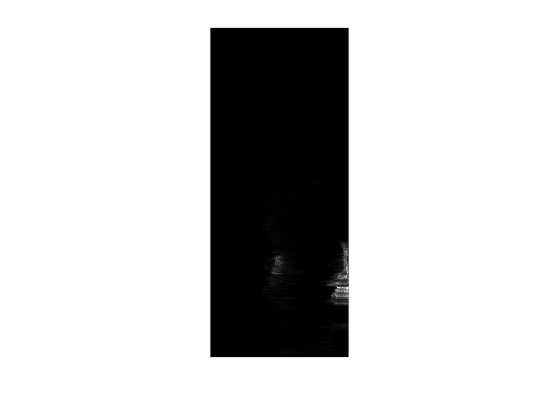

In [13]:
% as I understand, time is on the y axis in this plot
% TODO: add axis labels / ticks

imshow(full(hist_data), [0, max(full(hist_data), [], 'all')])